In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib

matplotlib.rc('font', family='Microsoft JhengHei')

In [2]:
def draw_column_correlation(maternal: pd.DataFrame, column: str, sort=False, interval=1, x_ticks=None):
    maternal = maternal.copy()
    sample_datas = []

    for key, value in maternal[column].value_counts().items():
        sample_data = maternal[maternal[column] == key][[column, 'ITM40']]
        std = sample_data['ITM40'].std()
        mean = sample_data['ITM40'].mean()
        sample_data = sample_data[sample_data['ITM40'] < mean + 2 * std]
        sample_data = sample_data[sample_data['ITM40'] > mean - 2 * std]
        sample_datas.append((key, sample_data))

    if sort:
        sample_datas = sorted(sample_datas, key=lambda x: x[1]['ITM40'].mean())
        for k, v in enumerate(sample_datas):
            v[1][column] = k

    sample_datas_df = pd.concat([s[1] for s in sample_datas])

    X = sample_datas_df[column].values.reshape(-1, 1)
    Y = MinMaxScaler().fit_transform(sample_datas_df['ITM40'].values.reshape(-1, 1)).flatten()
    model = LinearRegression()

    model.fit(X, Y)
    slope = model.coef_[0]
    intercept = model.intercept_
    correlation = np.corrcoef(X.flatten(), Y)[0, 1]

    plt.figure(figsize=(10, 6))
    text_str = f'Slope:{slope:.2f}\nIntercept: {intercept:.2f}\nCorrelation: {correlation:.2f}'
    plt.gcf().text(0.15, 0.85, text_str, fontsize=10, bbox=dict(facecolor='white', alpha=0.5),
                   horizontalalignment='left', verticalalignment='top')

    plt.scatter(X, Y, label='data polt')
    plt.plot(X, model.predict(X), color='red', linewidth=2, label='regression line')
    plt.legend(loc='upper right')

    if x_ticks and sort:
        for i in sample_datas:
            try:
                x_ticks[i[0]]
            except:
                print(i[0])

        plt.xticks([i for i in range(len(maternal[column].value_counts()))], [x_ticks[i[0]] for i in sample_datas],
                   rotation=45, ha="right")

    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(interval))

In [3]:
all = pd.read_csv('../data/raw/all.csv')

all = all.drop(columns=['IMR'])

all['MRG'] = all['MRG'].apply(lambda x: x if x in [91, 92, 93, 94, 95, 96, 97] else 90)

for k in all['REL'].value_counts().keys()[-1:]:
    all = all[all['REL'] != k]

for k in all['WORKPLACE'].value_counts().keys()[-2:]:
    all = all[all['WORKPLACE'] != k]

all

,YEAR,ID,PERSON,REL,SEX,AGE,EDU,IND,OCC,WKCLASS,WORK,WORKPLACE,MRG,PT,ITM40
0,2011,1,1,1,1,52,4,94,7,3,1,2,90,2,825298
1,2011,2,1,1,1,17,6,55,5,2,1,2,91,2,309703
2,2011,3,2,1,2,35,4,55,5,2,1,2,90,2,302983
3,2011,4,1,1,1,72,1,3,63,3,1,2,90,2,311731
4,2011,5,1,1,2,47,3,8,8,2,1,2,94,2,277353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290884,2021,5613,3,3,2,24,7,64,3,2,1,63,91,2,519318
290885,2021,5613,51,3,2,21,5,55,5,2,1,17,91,2,295070
290886,2021,5614,1,5,2,61,6,0,0,8,2,0,97,2,220908
290887,2021,5614,31,1,2,36,8,45,3,2,1,63,91,2,456941


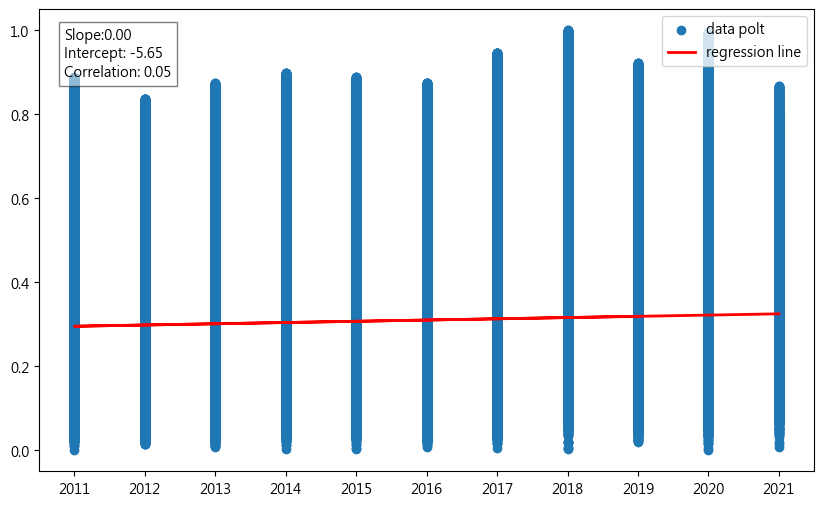

In [4]:
draw_column_correlation(all, 'YEAR')

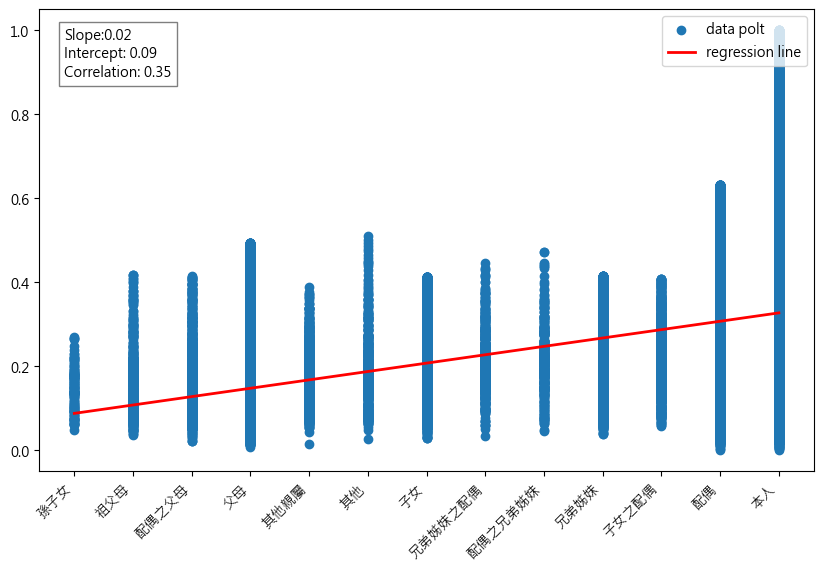

In [5]:
rel_ticks = {
    1: "本人",
    2: "配偶",
    3: "子女",
    4: "孫子女",
    5: "父母",
    6: "祖父母",
    7: "兄弟姊妹",
    8: "子女之配偶",
    9: "孫子女之配偶",
    10: "兄弟姊妹之配偶",
    11: "配偶之父母",
    12: "配偶之兄弟姊妹",
    13: "其他親屬",
    14: "其他"
}
draw_column_correlation(all, 'REL', sort=True, interval=1, x_ticks=rel_ticks)

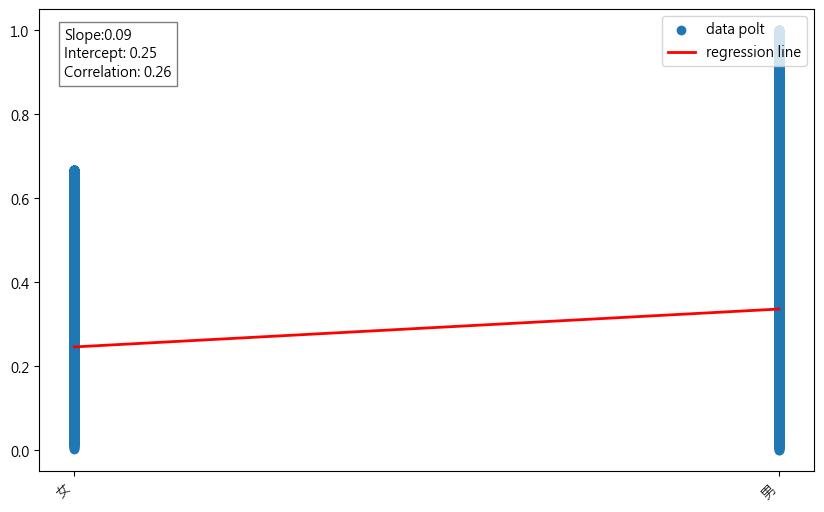

In [16]:
draw_column_correlation(all, 'SEX', sort=True, x_ticks={1: "男", 2: "女"})

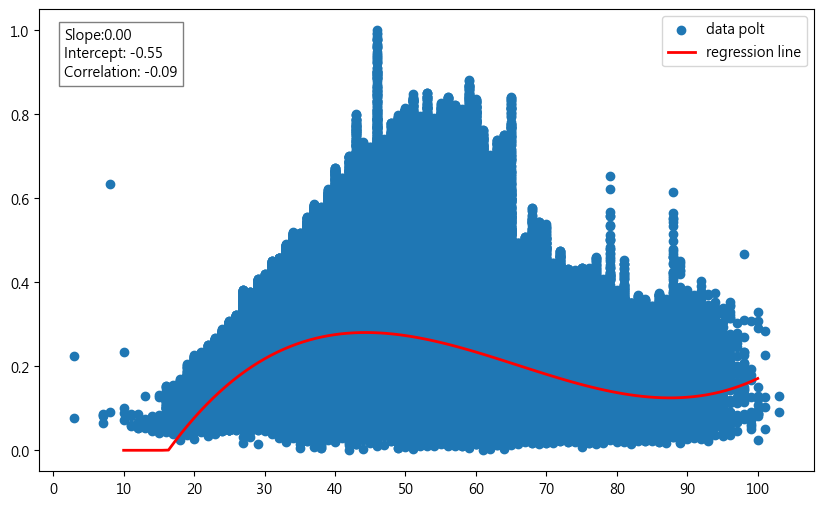

In [57]:
maternal = all.copy()
column = "AGE"
interval = 10
sample_datas = []

for key, value in maternal[column].value_counts().items():
    sample_data = maternal[maternal[column] == key][[column, 'ITM40']]
    std = sample_data['ITM40'].std()
    mean = sample_data['ITM40'].mean()
    sample_data = sample_data[sample_data['ITM40'] < mean + 2 * std]
    sample_data = sample_data[sample_data['ITM40'] > mean - 2 * std]
    sample_datas.append((key, sample_data))

sample_datas_df = pd.concat([s[1] for s in sample_datas])

X = sample_datas_df[column].values.reshape(-1, 1)
Y = MinMaxScaler().fit_transform(sample_datas_df['ITM40'].values.reshape(-1, 1)).flatten()

poly_features = PolynomialFeatures(degree=3, include_bias=True)

X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, Y)
slope = model.coef_[0]
intercept = model.intercept_
correlation = np.corrcoef(X.flatten(), Y)[0, 1]

plt.figure(figsize=(10, 6))
text_str = f'Slope:{slope:.2f}\nIntercept: {intercept:.2f}\nCorrelation: {correlation:.2f}'
plt.gcf().text(0.15, 0.85, text_str, fontsize=10, bbox=dict(facecolor='white', alpha=0.5), horizontalalignment='left',
               verticalalignment='top')
plt.scatter(X, Y, label='data polt')

plot_x = np.linspace(10, 100, 100).reshape(-1, 1)
plot_y = model.predict(poly_features.transform(plot_x))

plt.plot(plot_x, np.maximum(plot_y, 0),
    color='red', linewidth=2, label='regression line'
)

plt.legend(loc='upper right')

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(interval))

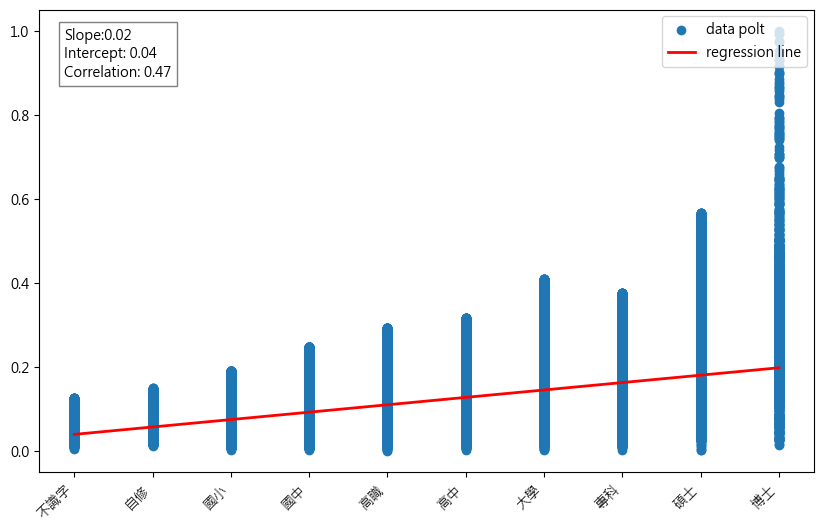

In [8]:
edu_ticks = {
    1: "不識字",
    2: "自修",
    3: "國小",
    4: "國中",
    5: "高中",
    6: "高職",
    7: "專科",
    8: "大學",
    9: "碩士",
    10: "博士"
}
draw_column_correlation(all, 'EDU', sort=True, x_ticks=edu_ticks)

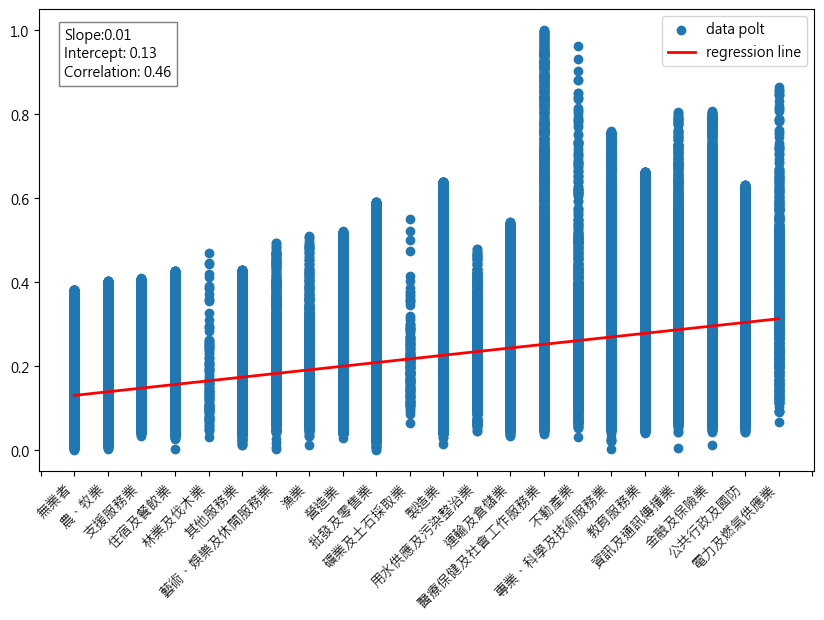

In [9]:
ind_ticks = {
    0: "無業者",
    1: "農、牧業",
    2: "林業及伐木業",
    3: "漁業",
    5: "礦業及土石採取業",
    8: "製造業",
    35: "電力及燃氣供應業",
    36: "用水供應及污染整治業",
    41: "營造業",
    45: "批發及零售業",
    55: "住宿及餐飲業",
    49: "運輸及倉儲業",
    58: "資訊及通訊傳播業",
    64: "金融及保險業",
    67: "不動產業",
    69: "專業、科學及技術服務業",
    77: "支援服務業",
    85: "教育服務業",
    86: "醫療保健及社會工作服務業",
    90: "藝術、娛樂及休閒服務業",
    94: "其他服務業",
    83: "公共行政及國防"
}

draw_column_correlation(all, 'IND', sort=True, interval=1, x_ticks=ind_ticks)

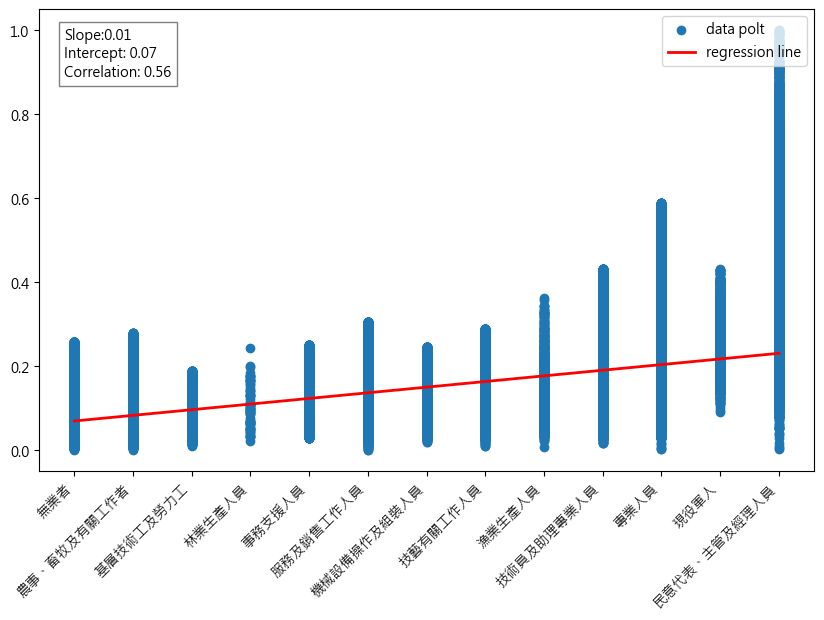

In [10]:
occ_ticks = {
    0: "無業者",
    1: "民意代表、主管及經理人員",
    2: "專業人員",
    3: "技術員及助理專業人員",
    4: "事務支援人員",
    5: "服務及銷售工作人員",
    61: "農事、畜牧及有關工作者",
    62: "林業生產人員",
    63: "漁業生產人員",
    7: "技藝有關工作人員",
    8: "機械設備操作及組裝人員",
    9: "基層技術工及勞力工",
    10: "現役軍人",
}
draw_column_correlation(all, 'OCC', sort=True, interval=1, x_ticks=occ_ticks)

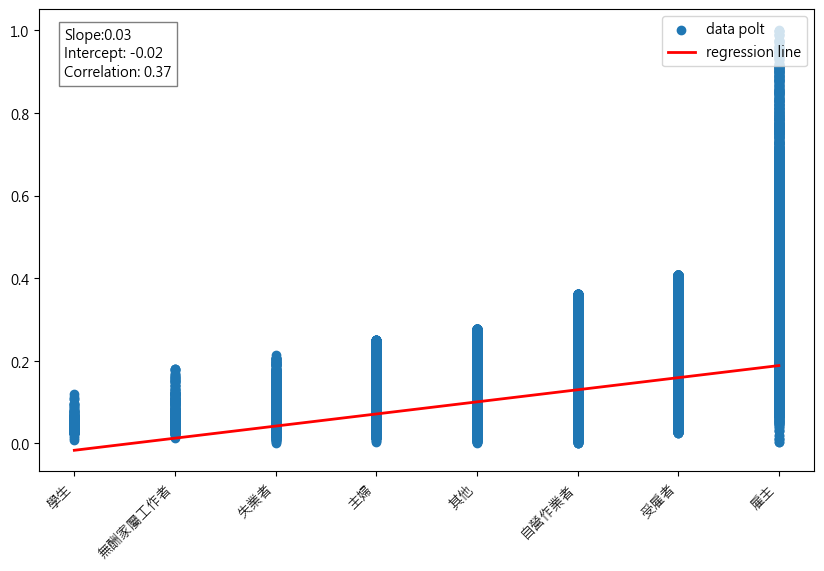

In [11]:
wkclass_ticks = {
    1: "雇主",
    2: "受雇者",
    3: "自營作業者",
    4: "無酬家屬工作者",
    5: "失業者",
    7: "學生",
    8: "主婦",
    9: "其他"
}
draw_column_correlation(all, 'WKCLASS', sort=True, interval=1, x_ticks=wkclass_ticks)

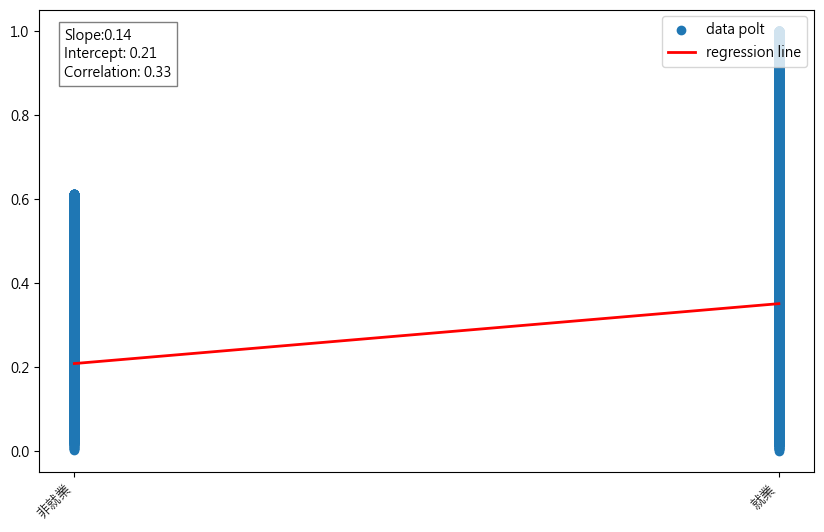

In [12]:
draw_column_correlation(all, 'WORK', sort=True, x_ticks={1: "就業", 2: "非就業"})

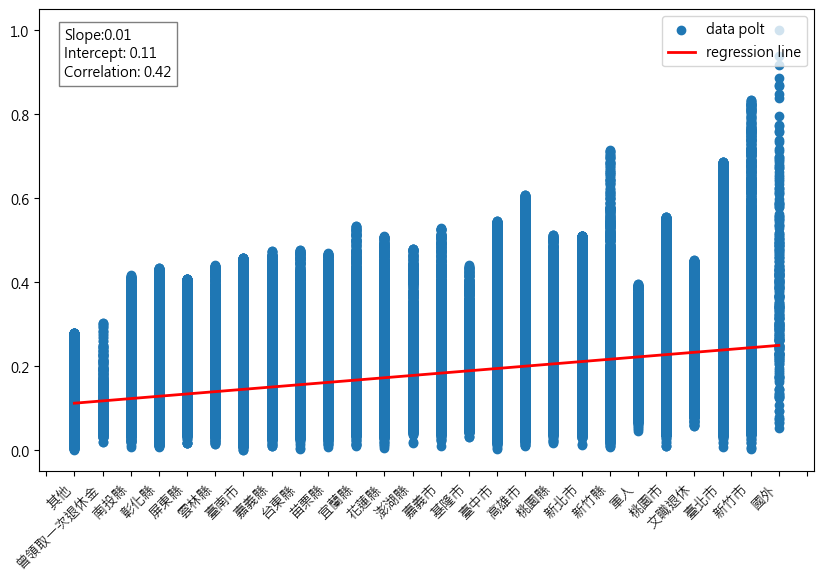

In [13]:
workplace_ticks = {
    1: "台北縣",
    2: "宜蘭縣",
    3: "桃園縣",
    4: "新竹縣",
    5: "苗栗縣",
    6: "台中縣",
    7: "彰化縣",
    8: "南投縣",
    9: "雲林縣",
    10: "嘉義縣",
    11: "台南縣",
    12: "高雄縣",
    13: "屏東縣",
    14: "台東縣",
    15: "花蓮縣",
    16: "澎湖縣",
    17: "基隆市",
    18: "新竹市",
    19: "臺中市",
    20: "嘉義市",
    21: "臺南市",
    63: "臺北市",
    64: "高雄市",
    65: "新北市",
    66: "臺中市",
    67: "臺南市",
    68: "桃園市",
    97: "曾領取一次退休金",
    98: "軍人",
    99: "文職退休",
    61: "國外",
    0: "其他"
}
draw_column_correlation(all, 'WORKPLACE', sort=True, interval=1, x_ticks=workplace_ticks)


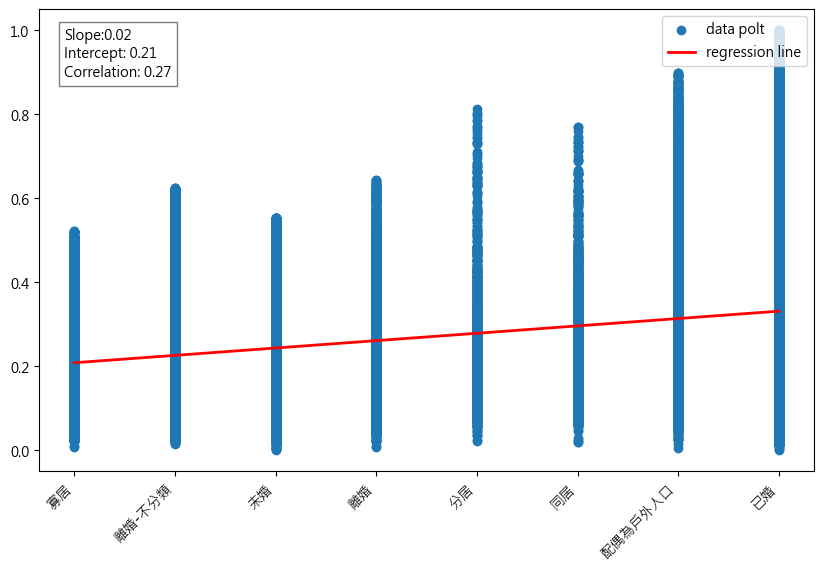

In [14]:
mrg_ticks = {
    90: "已婚",
    91: "未婚",
    92: "配偶為戶外人口",
    93: "同居",
    94: "離婚",
    95: "分居",
    96: "寡居",
    97: "離婚-不分類"
}
draw_column_correlation(all, 'MRG', sort=True, interval=1, x_ticks=mrg_ticks)

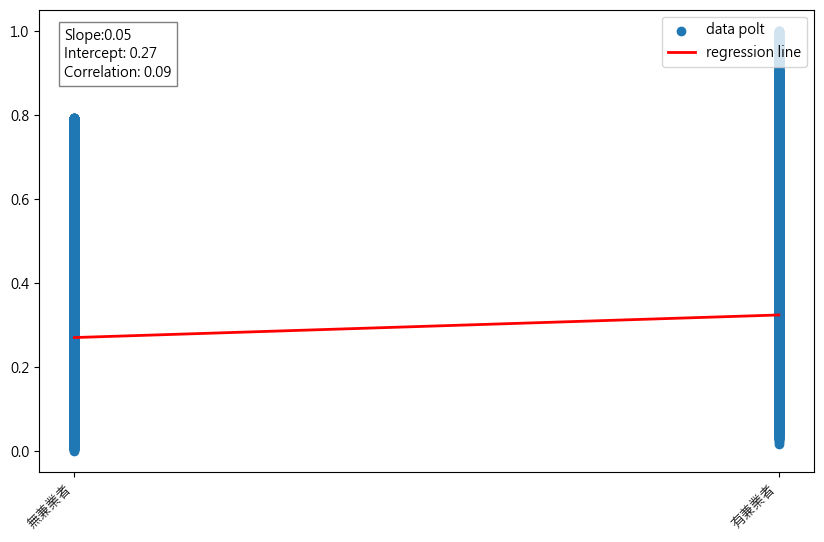

In [15]:
draw_column_correlation(all, 'PT', sort=True, interval=1, x_ticks={1: "有兼業者", 2: "無兼業者"})